In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [4]:
df_min=df[df['10']==1]

In [5]:
df_min.to_csv('page-blocks0_minority_train.csv',index=False)
df_min=pd.read_csv('page-blocks0_minority_train.csv')

In [6]:
df_majority=df[df['10']==0]
df_majority.to_csv('page-blocks0_majority_train.csv',index=False)
df_majority=pd.read_csv('page-blocks0_majority_train.csv')

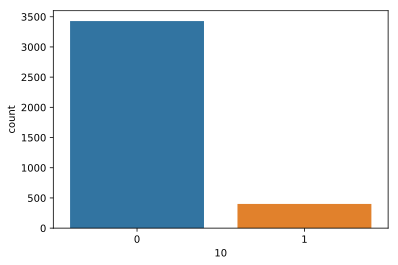

In [7]:
%matplotlib inline
sns.countplot(x='10',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(395, 5, 11)
(395, 11)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(11))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2560      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                231       
Total params: 2,791
Trainable params: 2,791
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
237/237 [==============================] - 3s 13ms/step - loss: 0.1195
Epoch 2/1000
237/237 [==============================] - 0s 495us/step - loss: 0.1046
Epoch 3/1000
237/237 [==============================] - 0s 601us/step - loss: 0.0928
Epoch 4/1000
237/237 [==============================] - 0s 580us/step - loss: 0.0821
Epoch 5/1000
237/237 [==============================] - 0s 508us/step - loss: 0.0712
Epoch 6/1000
237/237 [==============================] - 0s 503us/step - loss: 0.0599
Epoch 7/1000
237/237 [==============================] - 0s 586us/step - loss: 0.0489
Epoch 8/1000
237/237 [==============================] - 0s 512us/step - loss: 0.0409
Epoch 9/1000
237/237 [==============================] - 0s 512us/step - loss: 0.0369
Epoch 10/1000
237/237 [==============================] - 0s 512us/step - loss: 0.0364
Epoch 11/1000
237/237 [==============================] - 0s 565us/step - loss: 0.0363
Epoch 12/1000
237/237 [==============================] - 0s 512u

237/237 [==============================] - 0s 542us/step - loss: 0.0341
Epoch 97/1000
237/237 [==============================] - 0s 512us/step - loss: 0.0341
Epoch 98/1000
237/237 [==============================] - 0s 630us/step - loss: 0.0340
Epoch 99/1000
237/237 [==============================] - 0s 707us/step - loss: 0.0340
Epoch 100/1000
237/237 [==============================] - 0s 755us/step - loss: 0.0340
Epoch 101/1000
237/237 [==============================] - 0s 838us/step - loss: 0.0342
Epoch 102/1000
237/237 [==============================] - 0s 726us/step - loss: 0.0340
Epoch 103/1000
237/237 [==============================] - 0s 647us/step - loss: 0.0341
Epoch 104/1000
237/237 [==============================] - 0s 701us/step - loss: 0.0341
Epoch 105/1000
237/237 [==============================] - 0s 726us/step - loss: 0.0340
Epoch 106/1000
237/237 [==============================] - 0s 821us/step - loss: 0.0340
Epoch 107/1000
237/237 [==============================] - 0s 

237/237 [==============================] - 0s 525us/step - loss: 0.0334
Epoch 191/1000
237/237 [==============================] - 0s 508us/step - loss: 0.0334
Epoch 192/1000
237/237 [==============================] - 0s 503us/step - loss: 0.0335
Epoch 193/1000
237/237 [==============================] - 0s 491us/step - loss: 0.0335
Epoch 194/1000
237/237 [==============================] - 0s 491us/step - loss: 0.0334
Epoch 195/1000
237/237 [==============================] - 0s 495us/step - loss: 0.0334
Epoch 196/1000
237/237 [==============================] - 0s 495us/step - loss: 0.0334
Epoch 197/1000
237/237 [==============================] - 0s 491us/step - loss: 0.0333
Epoch 198/1000
237/237 [==============================] - 0s 499us/step - loss: 0.0335
Epoch 199/1000
237/237 [==============================] - 0s 491us/step - loss: 0.0334
Epoch 200/1000
237/237 [==============================] - 0s 512us/step - loss: 0.0333
Epoch 201/1000
237/237 [==============================] - 

237/237 [==============================] - 0s 554us/step - loss: 0.0327
Epoch 285/1000
237/237 [==============================] - 0s 554us/step - loss: 0.0326
Epoch 286/1000
237/237 [==============================] - 0s 495us/step - loss: 0.0327
Epoch 287/1000
237/237 [==============================] - 0s 503us/step - loss: 0.0328
Epoch 288/1000
237/237 [==============================] - 0s 516us/step - loss: 0.0326
Epoch 289/1000
237/237 [==============================] - 0s 495us/step - loss: 0.0327
Epoch 290/1000
237/237 [==============================] - 0s 685us/step - loss: 0.0326
Epoch 291/1000
237/237 [==============================] - 0s 683us/step - loss: 0.0327
Epoch 292/1000
237/237 [==============================] - 0s 723us/step - loss: 0.0326
Epoch 293/1000
237/237 [==============================] - 0s 704us/step - loss: 0.0327
Epoch 294/1000
237/237 [==============================] - 0s 781us/step - loss: 0.0327
Epoch 295/1000
237/237 [==============================] - 

237/237 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 379/1000
237/237 [==============================] - 0s 895us/step - loss: 0.0317
Epoch 380/1000
237/237 [==============================] - 0s 793us/step - loss: 0.0317
Epoch 381/1000
237/237 [==============================] - 0s 802us/step - loss: 0.0316
Epoch 382/1000
237/237 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 383/1000
237/237 [==============================] - 0s 914us/step - loss: 0.0318
Epoch 384/1000
237/237 [==============================] - 0s 774us/step - loss: 0.0319
Epoch 385/1000
237/237 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 386/1000
237/237 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 387/1000
237/237 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 388/1000
237/237 [==============================] - 0s 1ms/step - loss: 0.0316A: 0s - loss: 0.031
Epoch 389/1000
237/237 [===========================

237/237 [==============================] - 0s 664us/step - loss: 0.0306
Epoch 472/1000
237/237 [==============================] - 0s 630us/step - loss: 0.0306
Epoch 473/1000
237/237 [==============================] - 0s 632us/step - loss: 0.0307
Epoch 474/1000
237/237 [==============================] - 0s 630us/step - loss: 0.0304
Epoch 475/1000
237/237 [==============================] - 0s 626us/step - loss: 0.0306
Epoch 476/1000
237/237 [==============================] - 0s 613us/step - loss: 0.0305
Epoch 477/1000
237/237 [==============================] - 0s 609us/step - loss: 0.0305
Epoch 478/1000
237/237 [==============================] - 0s 613us/step - loss: 0.0304
Epoch 479/1000
237/237 [==============================] - 0s 605us/step - loss: 0.0308
Epoch 480/1000
237/237 [==============================] - 0s 609us/step - loss: 0.0306
Epoch 481/1000
237/237 [==============================] - 0s 604us/step - loss: 0.0304
Epoch 482/1000
237/237 [==============================] - 

237/237 [==============================] - 0s 764us/step - loss: 0.0294
Epoch 566/1000
237/237 [==============================] - 0s 675us/step - loss: 0.0294
Epoch 567/1000
237/237 [==============================] - 0s 690us/step - loss: 0.0294
Epoch 568/1000
237/237 [==============================] - 0s 820us/step - loss: 0.0295
Epoch 569/1000
237/237 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 570/1000
237/237 [==============================] - 0s 677us/step - loss: 0.0294
Epoch 571/1000
237/237 [==============================] - 0s 842us/step - loss: 0.0293
Epoch 572/1000
237/237 [==============================] - 0s 952us/step - loss: 0.0296
Epoch 573/1000
237/237 [==============================] - 0s 821us/step - loss: 0.0294
Epoch 574/1000
237/237 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 575/1000
237/237 [==============================] - 0s 894us/step - loss: 0.0295
Epoch 576/1000
237/237 [==============================] - 0s 7

237/237 [==============================] - 0s 704us/step - loss: 0.0281
Epoch 660/1000
237/237 [==============================] - 0s 705us/step - loss: 0.0279
Epoch 661/1000
237/237 [==============================] - 0s 635us/step - loss: 0.0282
Epoch 662/1000
237/237 [==============================] - 0s 787us/step - loss: 0.0280
Epoch 663/1000
237/237 [==============================] - 0s 728us/step - loss: 0.0281
Epoch 664/1000
237/237 [==============================] - 0s 673us/step - loss: 0.0279
Epoch 665/1000
237/237 [==============================] - 0s 677us/step - loss: 0.0279
Epoch 666/1000
237/237 [==============================] - 0s 608us/step - loss: 0.0281
Epoch 667/1000
237/237 [==============================] - 0s 755us/step - loss: 0.0282
Epoch 668/1000
237/237 [==============================] - 0s 705us/step - loss: 0.0280
Epoch 669/1000
237/237 [==============================] - 0s 563us/step - loss: 0.0280
Epoch 670/1000
237/237 [==============================] - 

237/237 [==============================] - 0s 647us/step - loss: 0.0268
Epoch 754/1000
237/237 [==============================] - 0s 605us/step - loss: 0.0268
Epoch 755/1000
237/237 [==============================] - 0s 588us/step - loss: 0.0272
Epoch 756/1000
237/237 [==============================] - 0s 558us/step - loss: 0.0268
Epoch 757/1000
237/237 [==============================] - 0s 613us/step - loss: 0.0264
Epoch 758/1000
237/237 [==============================] - 0s 588us/step - loss: 0.0265
Epoch 759/1000
237/237 [==============================] - 0s 588us/step - loss: 0.0267
Epoch 760/1000
237/237 [==============================] - 0s 605us/step - loss: 0.0269
Epoch 761/1000
237/237 [==============================] - 0s 613us/step - loss: 0.0263
Epoch 762/1000
237/237 [==============================] - 0s 605us/step - loss: 0.0265
Epoch 763/1000
237/237 [==============================] - 0s 613us/step - loss: 0.0268
Epoch 764/1000
237/237 [==============================] - 

237/237 [==============================] - 0s 601us/step - loss: 0.0253
Epoch 848/1000
237/237 [==============================] - 0s 567us/step - loss: 0.0249
Epoch 849/1000
237/237 [==============================] - 0s 592us/step - loss: 0.0251
Epoch 850/1000
237/237 [==============================] - 0s 571us/step - loss: 0.0250
Epoch 851/1000
237/237 [==============================] - 0s 558us/step - loss: 0.0249
Epoch 852/1000
237/237 [==============================] - 0s 575us/step - loss: 0.0249
Epoch 853/1000
237/237 [==============================] - 0s 588us/step - loss: 0.0249
Epoch 854/1000
237/237 [==============================] - 0s 542us/step - loss: 0.0248
Epoch 855/1000
237/237 [==============================] - 0s 563us/step - loss: 0.0248 0s - loss: 0.025
Epoch 856/1000
237/237 [==============================] - 0s 546us/step - loss: 0.0247
Epoch 857/1000
237/237 [==============================] - 0s 558us/step - loss: 0.0249 0s - loss: 0.024
Epoch 858/1000
237/237 [

Epoch 941/1000
237/237 [==============================] - 0s 529us/step - loss: 0.0234
Epoch 942/1000
237/237 [==============================] - 0s 575us/step - loss: 0.0235
Epoch 943/1000
237/237 [==============================] - 0s 622us/step - loss: 0.0235
Epoch 944/1000
237/237 [==============================] - 0s 647us/step - loss: 0.0233
Epoch 945/1000
237/237 [==============================] - 0s 799us/step - loss: 0.0234
Epoch 946/1000
237/237 [==============================] - 0s 996us/step - loss: 0.0235
Epoch 947/1000
237/237 [==============================] - 0s 946us/step - loss: 0.0237
Epoch 948/1000
237/237 [==============================] - 0s 876us/step - loss: 0.0232
Epoch 949/1000
237/237 [==============================] - 0s 824us/step - loss: 0.0235
Epoch 950/1000
237/237 [==============================] - 0s 846us/step - loss: 0.0233
Epoch 951/1000
237/237 [==============================] - 0s 881us/step - loss: 0.0234
Epoch 952/1000
237/237 [===================

In [14]:
model.save('page-blocks0.h5')

In [15]:
Xtrain.shape

(237, 5, 11)

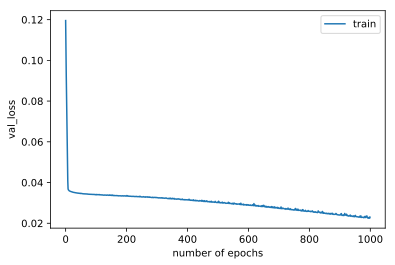

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

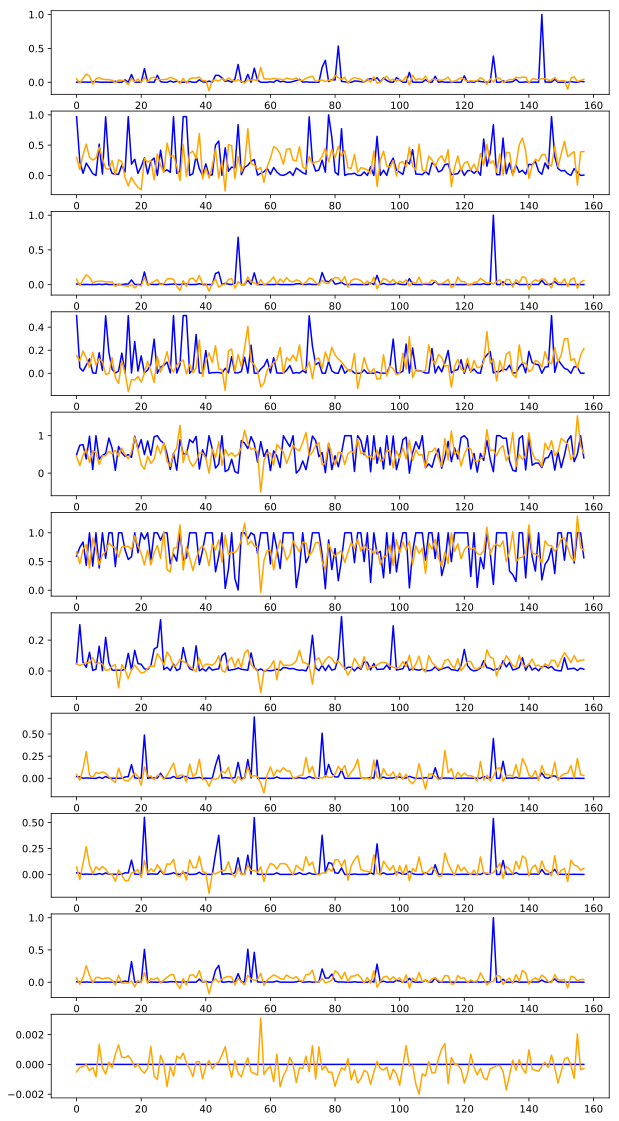

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 5.1185545e-02,  2.9721105e-01,  7.7252686e-02, ...,
         7.1917482e-02,  6.5452531e-02, -4.9665396e-04],
       [-9.9021085e-03,  9.5206127e-02, -1.4820229e-02, ...,
        -4.9239356e-02, -3.2505132e-02, -2.0221077e-04],
       [ 5.6852829e-02,  3.4084606e-01,  7.4445918e-02, ...,
         1.0593447e-01,  7.4410543e-02, -1.4543874e-04],
       ...,
       [ 1.1369232e-02, -1.5707166e-01, -5.2834786e-02, ...,
         7.8849018e-02,  2.1675840e-02,  2.0401769e-03],
       [ 2.5234368e-02,  3.8981432e-01,  3.4716010e-02, ...,
         4.0930409e-02,  4.2991802e-02, -3.3763671e-04],
       [ 4.4681814e-02,  3.9344096e-01,  5.8222041e-02, ...,
         5.8963191e-02,  4.1022494e-02, -2.7893452e-04]], dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

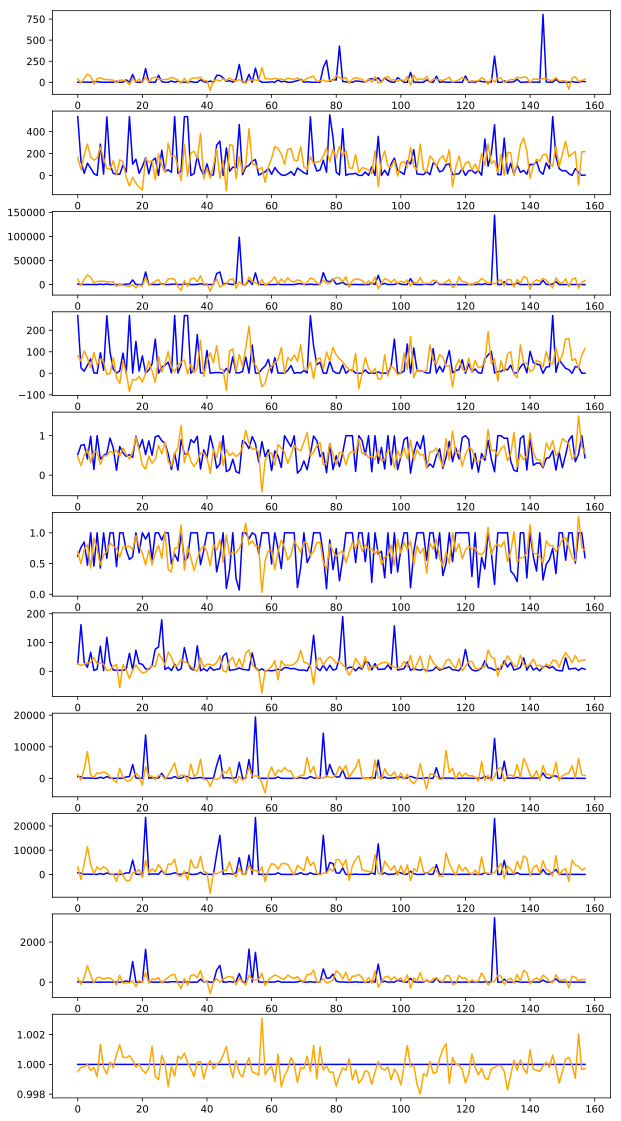

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 5.1185545e-02,  2.9721105e-01,  7.7252686e-02, ...,
         7.1917482e-02,  6.5452531e-02, -4.9665396e-04],
       [-9.9021085e-03,  9.5206127e-02, -1.4820229e-02, ...,
        -4.9239356e-02, -3.2505132e-02, -2.0221077e-04],
       [ 5.6852829e-02,  3.4084606e-01,  7.4445918e-02, ...,
         1.0593447e-01,  7.4410543e-02, -1.4543874e-04],
       ...,
       [ 1.1369232e-02, -1.5707166e-01, -5.2834786e-02, ...,
         7.8849018e-02,  2.1675840e-02,  2.0401769e-03],
       [ 2.5234368e-02,  3.8981432e-01,  3.4716010e-02, ...,
         4.0930409e-02,  4.2991802e-02, -3.3763671e-04],
       [ 4.4681814e-02,  3.9344096e-01,  5.8222041e-02, ...,
         5.8963191e-02,  4.1022494e-02, -2.7893452e-04]], dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)